In [24]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

🌫🛸


In [37]:
my_image_path='.\image\model.png'
print(my_image_path)
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다

type(img_bgr)


.\image\model.png


numpy.ndarray

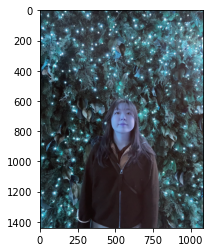

In [38]:
plt.imshow(img_bgr)
plt.show()


In [39]:
img_show = img_bgr.copy()

oprncv는 BGR을 사용하여 색깔 보정처리를 해줌

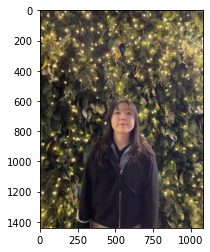

In [40]:
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

얼굴 검풀 face_setection

dlib의 HOG와 SVM을 사용해 얼굴을 찾음 

HOG - 화살표들이 어두운 방향으로 흐르는 방향 으로 특징 검풀 

얼굴의 위피는 SLICING WINDOW를 사용하여 얼굴 있는지 확인


In [42]:
#detector 선언
detector_hog=dlib.get_frontal_face_detector() #기본 얼굴 감지기를 반환

In [43]:
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
dlib_rects=detector_hog(img_rgb,1)  # (image, num of image pyramid)

dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환

이미지 피라미드:이미지를 upsampling 방법을 통해 크기를 키우는 것


In [44]:
print(dlib_rects) #찾은 얼굴 영역 박스 리스트

rectangles[[(448, 634) (634, 820)]]


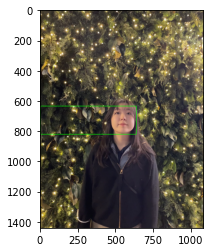

In [46]:
for dlib_rect in dlib_rects: #찾은 얼굴 영역의 좌표
    ㅣ=dlib_rect.left() #왼졲
    t=dlib_rect.top()
    r=dlib_rect.right()
    b=dlib_rect.bottom()

    cv2.rectangle(img_show,(1,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)# 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## face landmark
이목구비 위치 추론 

객체 내부의 점을 찾는 기술을 object keypoint estimation
top-down : bounding box를 찾고 box 내부의 keypoint를 예측

bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

Dlib의 제공되는 모델을 사용
공개되어 있는 weight file을 다운


In [48]:
model_path='./model/shape_predictor_68_face_landmarks.dat'
landmark_predictor=dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [49]:
#landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환
list_landmarks=[]

#face_laendmark 좌표 저장
for dlib_rect in dlib_rects:
    points=landmark_predictor(img_rgb,dlib_rect)
    list_points=list(map(lambda p: (p.x,p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
#68개의 랜드마트 위피가 나열된 리스트 

68


In [51]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show,point,2,(0,255,255),-1)
                    # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

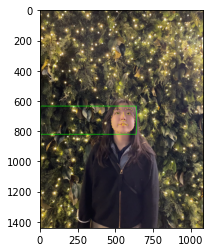

In [52]:
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

## 머리 위에 스티커 씌우기 
코 중심 기준으로 높이 위에 글도 되고, 비율로 계산해줘야함



In [57]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect,landmark in zip(dlib_rects,list_landmarks):
    print(landmark[30]) # 코의 index는 30 
    x=landmark[30][0]# 이미지에서 코 부위의 x값
    y=landmark[30][1]-dlib_rect.height()//2  # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)

    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    #코의 중심점 551  612

(551, 705)
(x,y) : (551,612)
(w,h) : (187,187)


In [59]:
sticker_path = os.getcwd()+'/image/hero.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
